# Schrödinger Equation

In this notebook we are solving the Schrödinger equation for a particle in a potential $V(x)$ numerically. The Schrödinger equation is given by

$$
\hat{H} \psi(x,t) = i \hbar \frac{\partial}{\partial t} \psi(x,t)
$$

where $\hat{H}$ is the Hamiltonian operator

$$
\hat{H} = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x)
$$

In this notebook we are solving the time-dependent Schrödinger equation numerically for a particle in a potential $V(x)$.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

We are using the following units:

$$
\hbar = 1, \quad m = 1, \quad \omega = 1
$$

The Hamiltonian operator is then given by

$$
\hat{H} = -\frac{1}{2} \frac{\partial^2}{\partial x^2} + V(x)
$$

The time-dependent Schrödinger equation is then given by

$$
i \frac{\partial}{\partial t} \psi(x,t) = \left(-\frac{1}{2} \frac{\partial^2}{\partial x^2} + V(x)\right) \psi(x,t)
$$


## Solving the Schrödinger equation

First, we need to discretize the space. We are using a grid with $N$ points $x_i$ with $i = 0, \dots, N-1$. The grid spacing is given by

In [2]:
x = np.linspace(-10, 10, 5000)
dx = x[1] - x[0]

we define a function to get the normalized wave function. Mathematically, it's defined as

$$
\frac{\displaystyle\int_{-\infty}^{\infty} |\psi(x,t)|^2 dx}{\displaystyle\int_{-\infty}^{\infty} dx} = 1
$$

and in a discretized form it's given by

$$
\frac{\displaystyle\sum_{i=0}^{N-1} |\psi(x_i,t)|^2 \Delta x}{\displaystyle\sum_{i=0}^{N-1} \Delta x} = 1
$$

In [3]:
def norm(phi):
    norm = np.sqrt(np.sum(np.abs(phi))*dx)
    return phi/norm

Also we create a function to return a wave packet with a given width $\sigma$, momentum $p$ and position $x_i$. Mathematically, it's given by

$$
\psi(x,t) = \exp\left(-\frac{(x-x_i)^2}{\sigma^2} + i p x\right)
$$

In [4]:
def wave_packet(xi=0, p=0, sigma=0.2):
    return norm(np.exp(-(x-xi)**2/(sigma**2) + 1j*p*(x)))

We test our function and plot an example

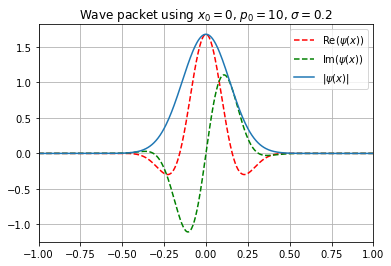

In [5]:
psi = wave_packet(xi=0, p=10, sigma=0.2)

# Plot the wave packet
plt.plot(x, psi.real, 'r--',label=r'Re$(\psi(x))$')
plt.plot(x, psi.imag, 'g--',label=r'Im$(\psi(x))$')
plt.plot(x, np.abs(psi), label=r'$|\psi(x)|$')
plt.legend()
plt.grid()
plt.xlim(-1, 1)
plt.title('Wave packet using $x_0=0$, $p_0=10$, $\sigma=0.2$')
plt.show()

As we'll use finite difference method, we need to discretize the second derivative. We are using the following approximation

$$
\psi''(x,t) \approx \frac{1}{\Delta x^2} \left(\psi(x+\Delta x,t) - 2 \psi(x,t) + \psi(x-\Delta x,t)\right)
$$

so the time-dependent Schrödinger equation becomes

$$
\frac{\partial}{\partial t} \psi(x,t) =\frac{i}{2} \frac{1}{\Delta x^2} \left(\psi(x+\Delta x,t) - 2 \psi(x,t) + \psi(x-\Delta x,t)\right) - iV(x) \psi(x,t)
$$

In [6]:
def d_dxdx(phi):
    dphi_dxdx = -2*phi
    dphi_dxdx[:-1] += phi[1:]
    dphi_dxdx[1:] += phi[:-1]
    return dphi_dxdx/dx

In [7]:
def d_dt(phi, V):
    return (1j/200)*d_dxdx(phi) - 1j*V*phi

Now we have a ordinary differential equation (ODE) for $\psi(x,t)$, which we can solve numerically. We are using the fourth-order Runge-Kutta method to solve the ODE. 

In [8]:
def rk4_solver(phi, V, dt):
    k1 = d_dt(phi, V)
    k2 = d_dt(phi + (dt/2)*k1, V)
    k3 = d_dt(phi + (dt/2)*k2, V)
    k4 = d_dt(phi + dt*k3, V)
    return phi + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

### Particle in a box

We solve Schrödinger Equation for a particle in a square potential well. The potential is given by

$$
V(x) = \begin{cases}
0 & \text{if } |x| < a \\
\infty & \text{if } |x| \geq a
\end{cases}
$$


In [9]:
# Solve the Schrodinger equation using the RK4 method
# Initial conditions
xi = 0
p = 0
sigma = 0.2
psi = wave_packet(xi=xi, p=p, sigma=sigma)

# Time step
dt = 0.1

# Number of time steps
n_steps = 50000

# Potential for the box
V = np.where(np.abs(x) < 1, 0, 10)

# Initialize the solution array
sol = np.array([psi])

# Solve the Schrodinger equation but only save the solution every 100 time steps
for i in range(n_steps):
    print(f"step {i}", end='\r')
    psi = rk4_solver(psi, V, dt)
    if i%300 == 0:
        sol = np.append(sol, [psi], axis=0)
        
print("Done!")

Done!49999


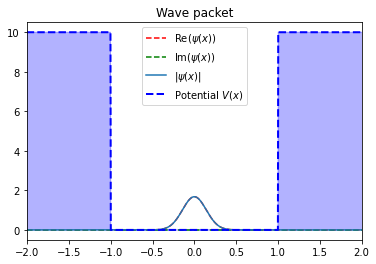

In [10]:
# Plot the solution
plt.plot(x, sol[0].real, 'r--',label=r'Re$(\psi(x))$')
plt.plot(x, sol[0].imag, 'g--',label=r'Im$(\psi(x))$')
plt.plot(x, np.abs(sol[0]), label=r'$|\psi(x)|$')
plt.plot(x, V, 'b--', lw=2, label='Potential $V(x)$')
plt.fill_between(x, V, alpha=0.3, color='b')
plt.legend()
plt.xlim(-2, 2)
plt.title('Wave packet')
plt.show()

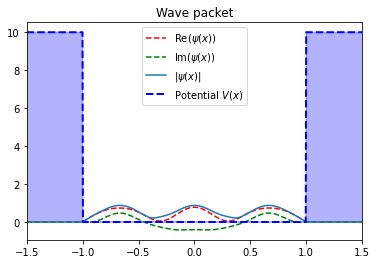

In [11]:
# Plot the solution
plt.plot(x, sol[-1].real, 'r--',label=r'Re$(\psi(x))$')
plt.plot(x, sol[-1].imag, 'g--',label=r'Im$(\psi(x))$')
plt.plot(x, np.abs(sol[-1]), label=r'$|\psi(x)|$')
plt.plot(x, V, 'b--', lw=2, label='Potential $V(x)$')
plt.fill_between(x, V, alpha=0.3, color='b')
plt.legend()
plt.xlim(-1.5, 1.5)
plt.title('Wave packet')
plt.show()

We create a animation of the time evolution of the wave packet

<IPython.core.display.Javascript object>


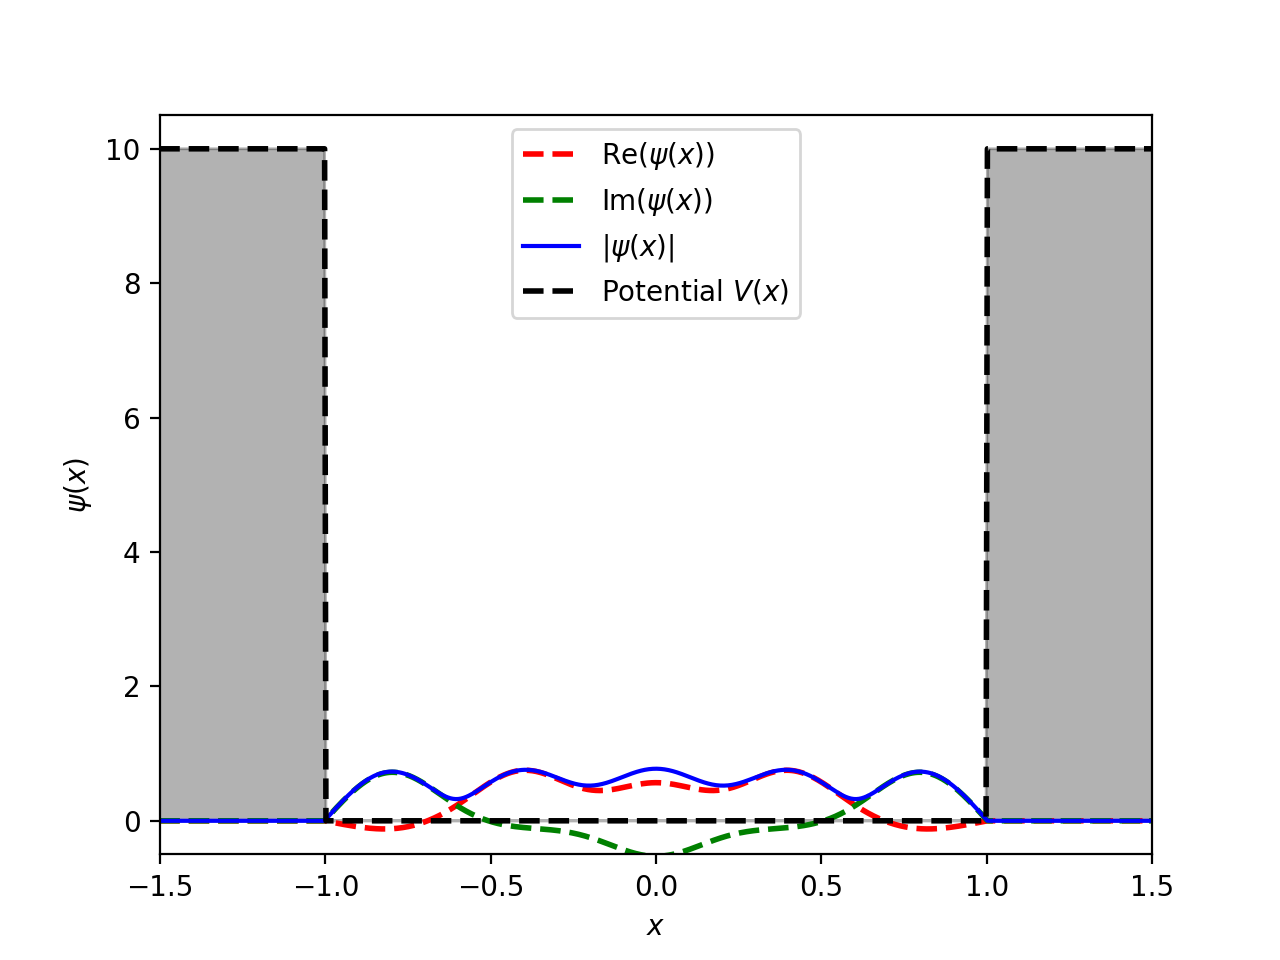

In [13]:
# Animation

%matplotlib notebook

fig, ax = plt.subplots()
ax.set_xlim((-1.5, 1.5))
ax.set_xlabel('$x$')
ax.set_ylabel(r'$\psi(x)$')
real, = ax.plot([], [], 'r--', label=r'Re$(\psi(x))$', lw=2)
imag, = ax.plot([], [], 'g--', label=r'Im$(\psi(x))$', lw=2)
prob, = ax.plot([], [], 'b', label=r'$|\psi(x)|$')
ax.plot(x, V, 'k--', lw=2, label='Potential $V(x)$')
ax.fill_between(x, V, alpha=0.3, color='k')
ax.legend()


def init():
    real.set_data([], [])
    imag.set_data([], [])
    prob.set_data([], [])
    return (real, imag, prob)

def animate(i):
    psi = sol[i]
    real.set_data(x, psi.real)
    imag.set_data(x, psi.imag)
    prob.set_data(x, np.abs(psi))
    return (real, imag, prob)

anim = FuncAnimation(fig, animate, init_func=init, frames=len(sol), interval=50, blit=True)

In [ ]:
anim.save('particle_in_a_box_zero_p.gif', fps=25)

In [691]:
anim.save('particle_in_a_box.gif', fps=25)

MovieWriter ffmpeg unavailable; using Pillow instead.


## Square potential well

We solve Schrödinger Equation for a particle in a square potential well. The potential is given by

$$
V(x) = \begin{cases}
0 & \text{if } |x| < a \\
\infty & \text{if } |x| \geq a
\end{cases}
$$


<IPython.core.display.Javascript object>


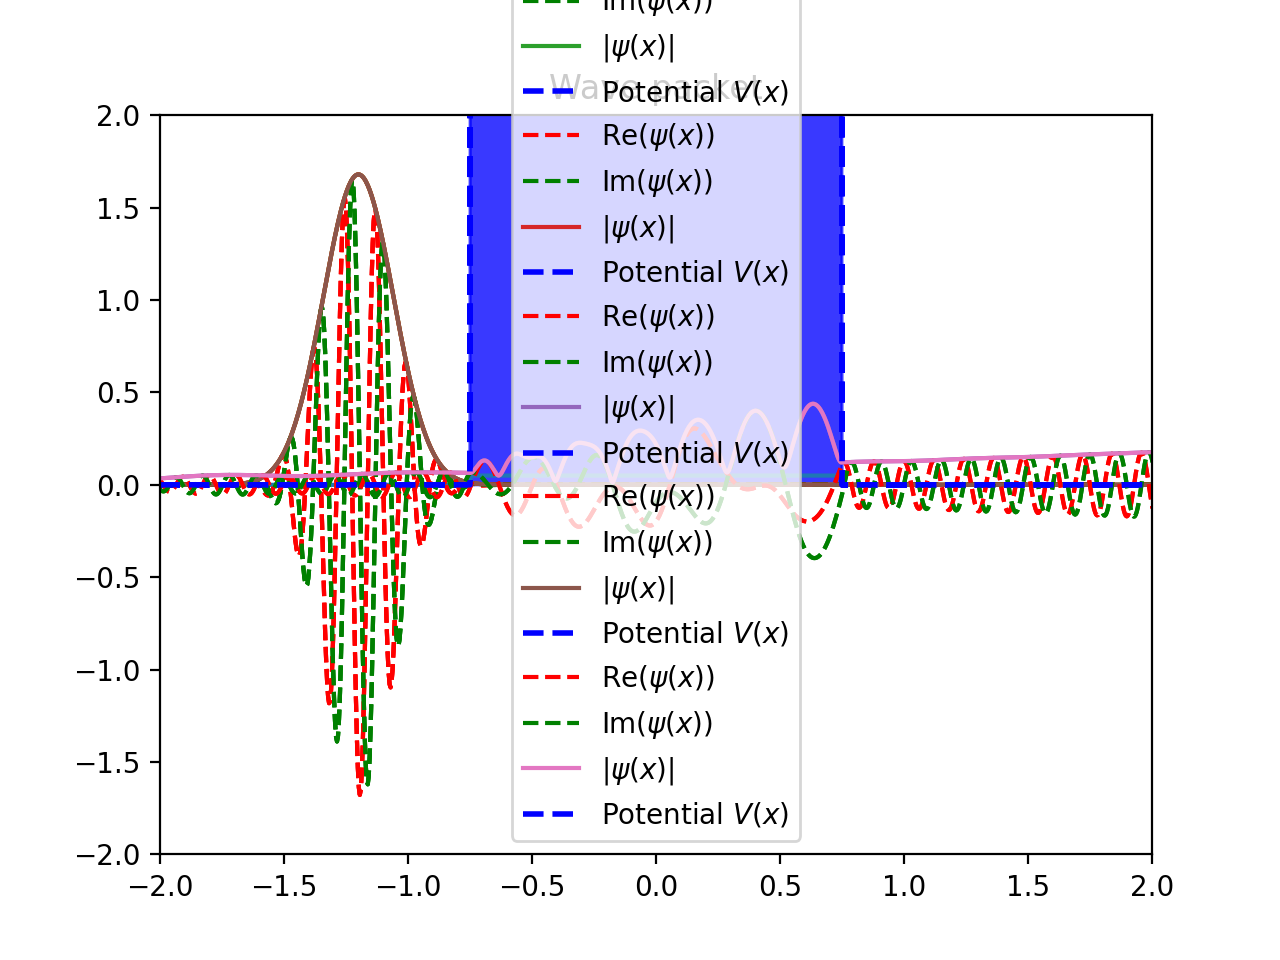

In [17]:
# Solve the Schrodinger equation using the RK4 method
# Initial conditions
xi = -1.2
p = 50
sigma = 0.2
psi = wave_packet(xi=xi, p=p, sigma=sigma)

# Time step
dt = 0.1

# Number of time steps
n_steps = 30000

# Potential for the infinite square well
V = np.where(np.abs(x) > 0.75, 0, 5e-2)
V_plot = np.where(np.abs(x) > 0.75, 0, 10)

# Plot the potential
plt.plot(x, V)
plt.plot(x, abs(psi))
plt.fill_between(x, V_plot, alpha=0.3, color='b')
plt.grid()
plt.xlim(-4, 4)
plt.title('Potential $V(x)$')
plt.show()

In [22]:
# Solve the equation
# Initialize the solution array
psi = wave_packet(xi=xi, p=p, sigma=sigma)
sol = [psi]

# Solve the Schrodinger equation but only save the solution every 100 time steps
for i in range(n_steps):
    print(f"step {i}", end='\r')
    psi = rk4_solver(psi, V, dt)
    if i%300 == 0:
        sol.append(psi)
        
print("Done!     ")

Done!     


In [23]:
# Plot the solution in t=0
plt.plot(x, sol[0].real, 'r--',label=r'Re$(\psi(x))$')
plt.plot(x, sol[0].imag, 'g--',label=r'Im$(\psi(x))$')
plt.plot(x, np.abs(sol[0]), label=r'$|\psi(x)|$')
plt.plot(x, V_plot, 'b--', lw=2, label='Potential $V(x)$')
plt.fill_between(x, 0, V_plot, color='b', alpha=0.2)
plt.legend()
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('Wave packet')
plt.show()

In [24]:
# Plot the solution t=final
plt.plot(x, sol[-1].real, 'r--',label=r'Re$(\psi(x))$')
plt.plot(x, sol[-1].imag, 'g--',label=r'Im$(\psi(x))$')
plt.plot(x, np.abs(sol[-1]), label=r'$|\psi(x)|$')
plt.plot(x, V_plot, 'b--', lw=2, label='Potential $V(x)$')
plt.fill_between(x, 0, V_plot, color='b', alpha=0.2)
plt.legend()
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('Wave packet')
plt.show()

<IPython.core.display.Javascript object>


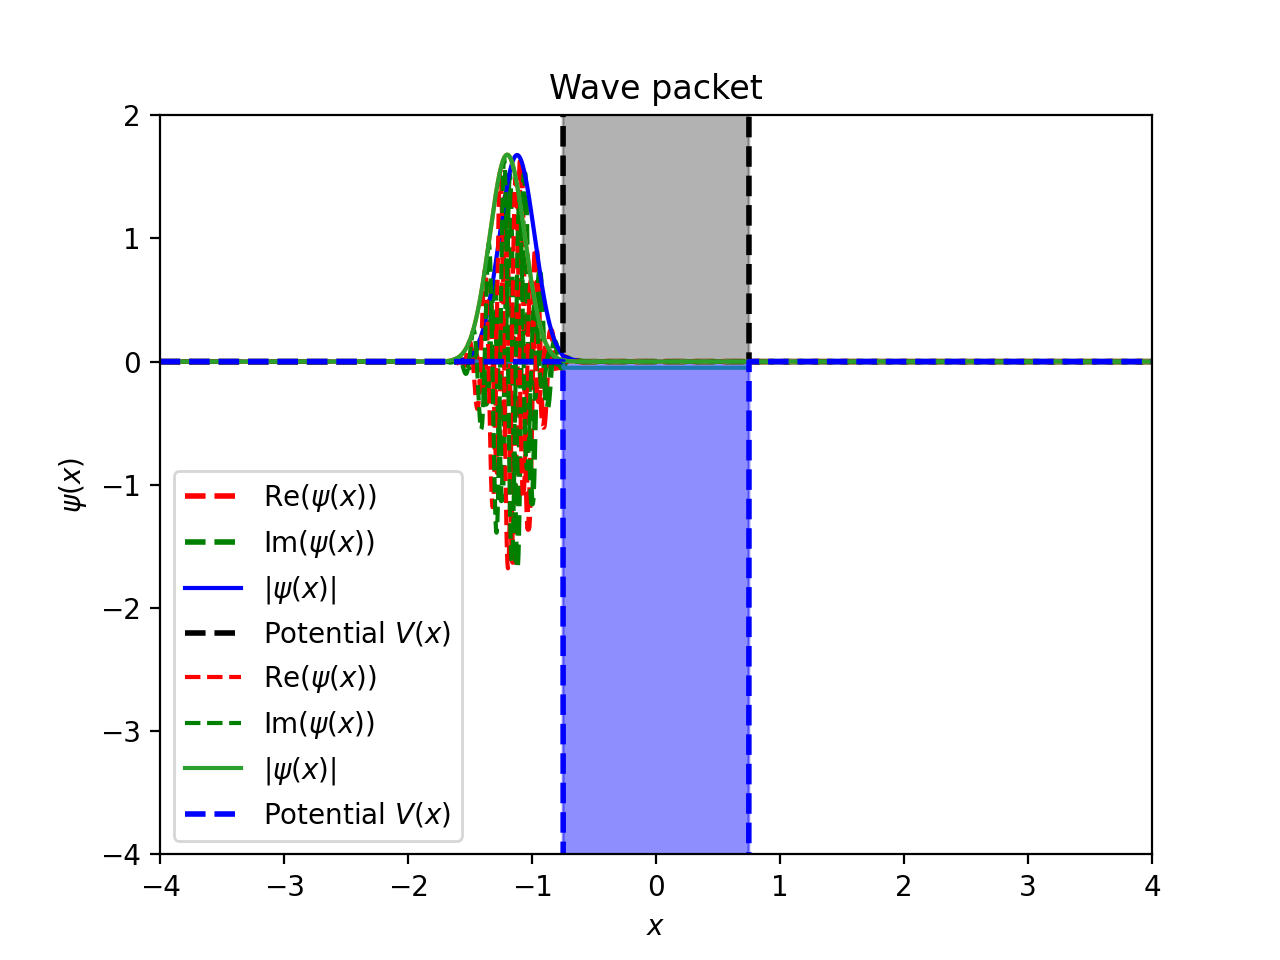

In [25]:
# Animation
fig, ax = plt.subplots()
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 2)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$\psi(x)$')
real, = ax.plot([], [], 'r--', label=r'Re$(\psi(x))$', lw=2)
imag, = ax.plot([], [], 'g--', label=r'Im$(\psi(x))$', lw=2)
prob, = ax.plot([], [], 'b', label=r'$|\psi(x)|$')
ax.plot(x, V_plot, 'k--', lw=2, label='Potential $V(x)$')
ax.fill_between(x, 0, V_plot, alpha=0.3, color='k')
ax.legend()


def init():
    real.set_data([], [])
    imag.set_data([], [])
    prob.set_data([], [])
    return (real, imag, prob)

def animate(i):
    psi = sol[i]
    real.set_data(x, psi.real)
    imag.set_data(x, psi.imag)
    prob.set_data(x, np.abs(psi))
    return (real, imag, prob)

anim = FuncAnimation(fig, animate, init_func=init, frames=len(sol), interval=10, blit=True)

In [26]:
anim.save('square_well.gif', fps=30)

MovieWriter ffmpeg unavailable; using Pillow instead.


## Attractive square potential 

We solve Schrödinger Equation for a particle in a attractive square potential well. The potential is given by

$$
V(x) = \begin{cases}
-V_0 & \text{if } |x| < a \\
0 & \text{if } |x| \geq a
\end{cases}
$$

In [27]:
# Solve the Schrodinger equation using the RK4 method
# Initial conditions
xi = -1.2
p = 50
sigma = 0.2
psi = wave_packet(xi=xi, p=p, sigma=sigma)

# Time step
dt = 0.1

# Number of time steps
n_steps = 40000

# Potential for the infinite square well
V = np.where(np.abs(x) > 0.75, 0, -5e-2)
V_plot = np.where(np.abs(x) > 0.75, 0, -10)

# Plot the potential
plt.plot(x, V)
plt.plot(x, abs(psi))
plt.fill_between(x, V_plot, alpha=0.3, color='b')
plt.grid()
plt.xlim(-4, 4)
plt.title('Potential $V(x)$')
plt.show()

In [28]:
# Solve the equation
# Initialize the solution array
psi = wave_packet(xi=xi, p=p, sigma=sigma)
sol = [psi]

# Solve the Schrodinger equation but only save the solution every 100 time steps
for i in range(n_steps):
    print(f"step {i}", end='\r')
    psi = rk4_solver(psi, V, dt)
    if i%100 == 0:
        sol.append(psi)
        
print("Done!")

Done!39999


In [29]:
# Plot the solution in t=0
plt.plot(x, sol[0].real, 'r--',label=r'Re$(\psi(x))$')
plt.plot(x, sol[0].imag, 'g--',label=r'Im$(\psi(x))$')
plt.plot(x, np.abs(sol[0]), label=r'$|\psi(x)|$')
plt.plot(x, V_plot, 'b--', lw=2, label='Potential $V(x)$')
plt.fill_between(x, 0, V_plot, color='b', alpha=0.2)
plt.legend()
plt.grid()
plt.xlim(-4, 4)
plt.ylim(-4, 2)
plt.title('Wave packet')
plt.show()

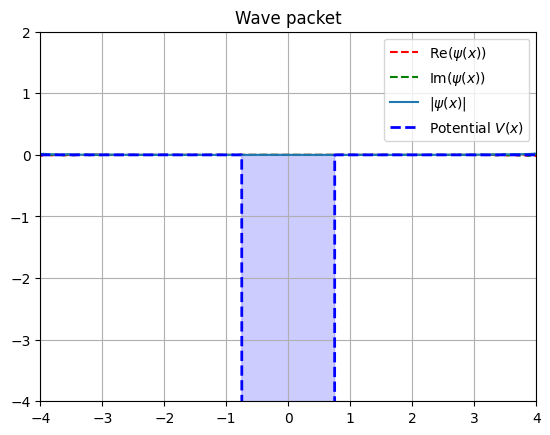

In [638]:
# Plot the solution in t=final
plt.plot(x, sol[-1].real, 'r--',label=r'Re$(\psi(x))$')
plt.plot(x, sol[-1].imag, 'g--',label=r'Im$(\psi(x))$')
plt.plot(x, np.abs(sol[-1]), label=r'$|\psi(x)|$')
plt.plot(x, V_plot, 'b--', lw=2, label='Potential $V(x)$')
plt.fill_between(x, 0, V_plot, color='b', alpha=0.2)
plt.legend()
plt.grid()
plt.xlim(-4, 4)
plt.ylim(-4, 2)
plt.title('Wave packet')
plt.show()

<IPython.core.display.Javascript object>


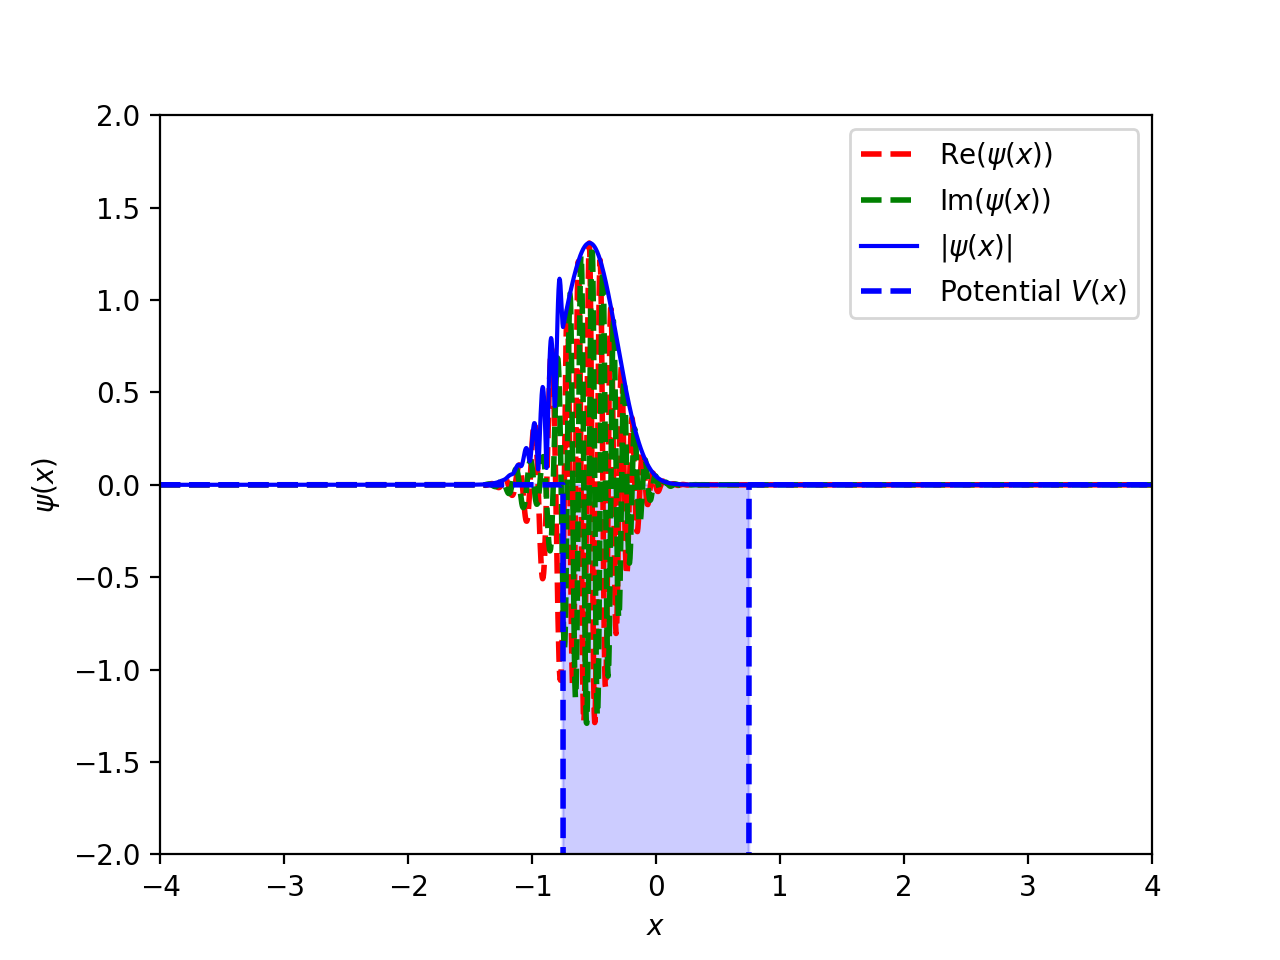

In [30]:
# Animation
fig, ax = plt.subplots()
ax.set_xlim((-4, 4))
ax.set_ylim((-2, 2))
ax.set_xlabel('$x$')
ax.set_ylabel(r'$\psi(x)$')
real, = ax.plot([], [], 'r--', label=r'Re$(\psi(x))$', lw=2)
imag, = ax.plot([], [], 'g--', label=r'Im$(\psi(x))$', lw=2)
prob, = ax.plot([], [], 'b', label=r'$|\psi(x)|$')
plt.plot(x, V_plot, 'b--', lw=2, label='Potential $V(x)$')
plt.fill_between(x, 0, V_plot, color='b', alpha=0.2)
ax.legend()


def init():
    real.set_data([], [])
    imag.set_data([], [])
    prob.set_data([], [])
    return (real, imag, prob)

def animate(i):
    psi = sol[i]
    real.set_data(x, psi.real)
    imag.set_data(x, psi.imag)
    prob.set_data(x, np.abs(psi))
    return (real, imag, prob)

anim = FuncAnimation(fig, animate, init_func=init, frames=len(sol)//2, interval=50, blit=True)

In [31]:
anim.save('attractive_potential.gif', fps=25)

MovieWriter ffmpeg unavailable; using Pillow instead.
